In [1]:
boston_df = read.csv('/home/jovyan/Project3/data/bostonhousing.csv', header=FALSE, sep='')

colnames(boston_df) = c('crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax', 'ptratio', 'black','lstat', 'medv')

In [2]:
head(boston_df,5)

crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0.00632,18,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
0.02731,0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
0.02729,0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
0.03237,0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
0.06905,0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [3]:
library(dplyr, warn.conflicts = FALSE)
library(moments)

In [4]:
stats = data.frame(feature=colnames(boston_df))
stats['mean_'] = sapply(boston_df, mean)
stats['sd_'] = sapply(boston_df, sd)
stats['skewness_'] = sapply(boston_df, skewness)
stats

feature,mean_,sd_,skewness_
crim,3.61352356,8.6015451,5.2076524
zn,11.36363636,23.3224530,2.2190631
indus,11.13677866,6.8603529,0.2941463
chas,0.06916996,0.2539940,3.3957993
nox,0.55469506,0.1158777,0.7271442
rm,6.28463439,0.7026171,0.4024147
age,68.57490119,28.1488614,-0.5971856
dis,3.79504269,2.1057101,1.0087788
rad,9.54940711,8.7072594,1.0018335
tax,408.23715415,168.5371161,0.6679683


In [5]:
boston_sc_df = data.frame(scale(boston_df))

In [6]:
stats_sc = data.frame(feature=colnames(boston_sc_df))
stats_sc['mean_'] = sapply(boston_sc_df, mean)
stats_sc['sd_'] = sapply(boston_sc_df, sd)
stats_sc

feature,mean_,sd_
crim,-7.202981e-18,1
zn,2.282481e-17,1
indus,1.595296e-17,1
chas,-3.544441e-18,1
nox,-2.150022e-16,1
rm,-1.056462e-16,1
age,-1.643357e-16,1
dis,1.153079e-16,1
rad,4.799652e-17,1
tax,2.024415e-17,1


Getting the previously defined sample of 60 records and converting it into Z-Scores and comparing with the original dataset.

In [7]:
set.seed(42)

In [8]:
sample_2 = sample_n(boston_df, 60)

In [9]:
stats1 = data.frame(feature=colnames(sample_2))
stats1['mean_'] = sapply(sample_2, mean)
stats1['sd_'] = sapply(sample_2, sd)
stats1['skewness_'] = sapply(sample_2, skewness)
stats1

feature,mean_,sd_,skewness_
crim,3.71903650,6.9050795,2.9310743
zn,12.66666667,26.4923505,2.0842554
indus,10.60433333,6.9966799,0.1660788
chas,0.03333333,0.1810203,5.1994695
nox,0.56009833,0.1232882,0.5784576
rm,6.30503333,0.7003888,0.2133041
age,65.88000000,27.2819665,-0.4143191
dis,3.82461500,2.3025516,1.2711613
rad,10.68333333,9.2598855,0.7074360
tax,423.03333333,176.8876850,0.4473447


In [10]:
sample_sc_df = data.frame(scale(sample_2))

In [11]:
stats_sc1 = data.frame(feature=colnames(sample_sc_df))
stats_sc1['mean_'] = sapply(sample_sc_df, mean)
stats_sc1['sd_'] = sapply(sample_sc_df, sd)
stats_sc1; stats_sc

feature,mean_,sd_
crim,-1.794716e-17,1
zn,-9.238306e-18,1
indus,1.286966e-16,1
chas,-6.499340e-18,1
nox,-3.177932e-16,1
rm,7.112366e-17,1
age,1.502993e-16,1
dis,-3.933598e-17,1
rad,-1.015943e-17,1
tax,-1.332322e-16,1


feature,mean_,sd_
crim,-7.202981e-18,1
zn,2.282481e-17,1
indus,1.595296e-17,1
chas,-3.544441e-18,1
nox,-2.150022e-16,1
rm,-1.056462e-16,1
age,-1.643357e-16,1
dis,1.153079e-16,1
rad,4.799652e-17,1
tax,2.024415e-17,1


The stats vary quite a bit and are not close between the sample dataset and the original.

Preparing a heatmap and a barplot of samples compared to the sample z-scores.

In [12]:
library(ggplot2)

In [13]:
library(repr)
options(repr.plot.width=5, repr.plot.height=2) 

In [14]:
source('multiplot.r')

In [15]:
scaled_v_original <- function (feature) {
    original_feature <- as.vector(sample_2[[feature]])
    scaled_feature <- as.vector(sample_sc_df[[feature]])
    p1 <- qplot(original_feature, geom="histogram", bins=200, alpha=I(.4),)+
        geom_vline(aes(xintercept=mean(original_feature)), color="red", linetype="dashed", size=1)+
        geom_vline(aes(xintercept=median(original_feature)), color="blue", linetype="dashed", size=1)+
        ggtitle(paste("Original Distribution of", feature))
    p2 <- qplot(scaled_feature, geom="histogram", bins=200, alpha=I(.4),)+
        geom_vline(aes(xintercept=mean(scaled_feature)), color="red", linetype="dashed", size=1)+
        geom_vline(aes(xintercept=median(scaled_feature)), color="blue", linetype="dashed", size=1)  +
        ggtitle(paste("Scaled Distribution of", feature))  
    multiplot(p1, p2, cols=2)
}


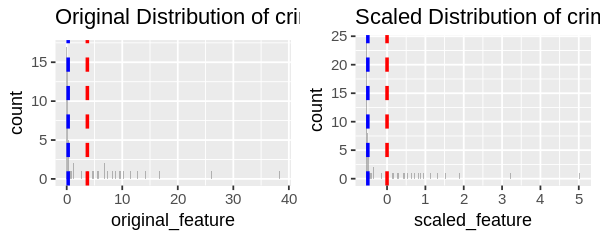

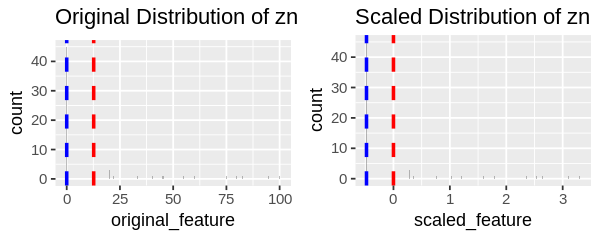

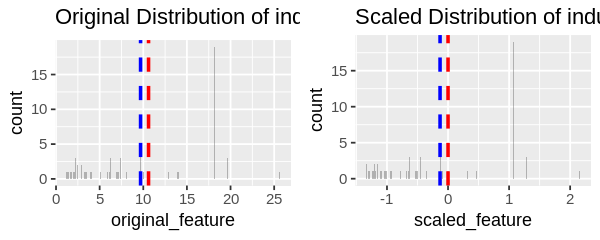

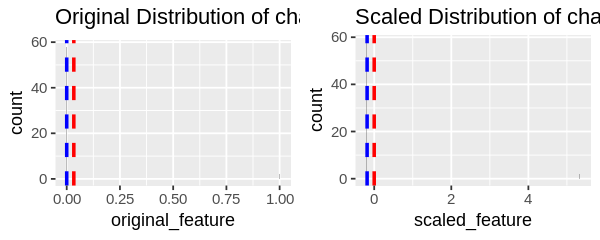

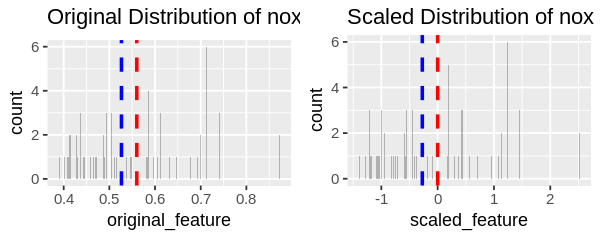

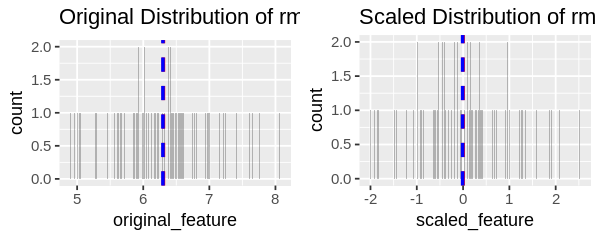

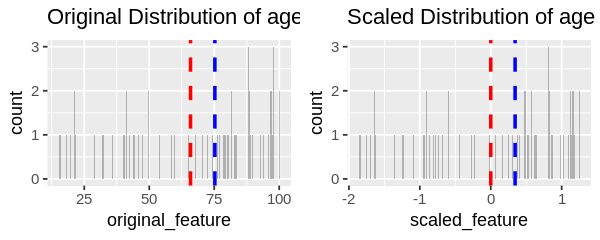

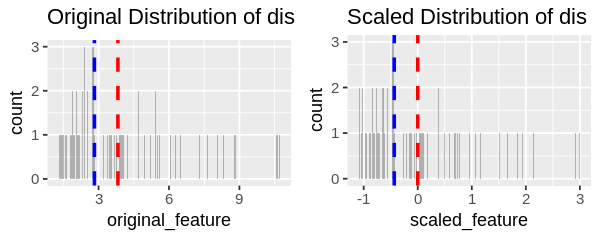

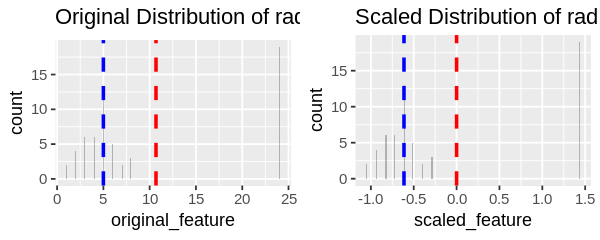

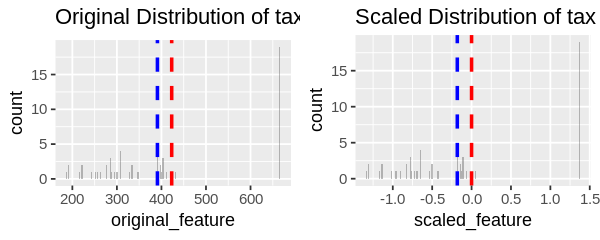

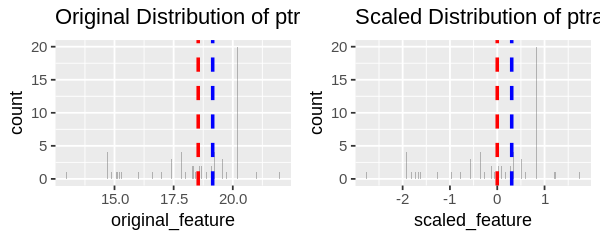

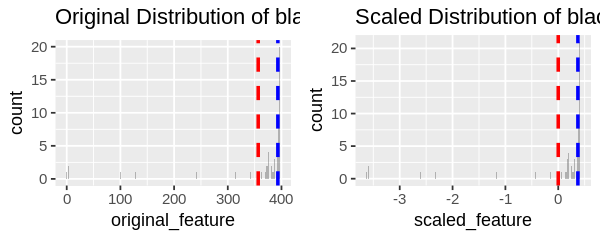

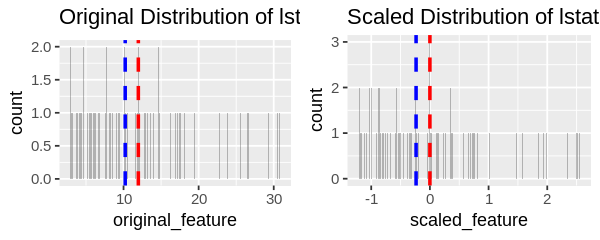

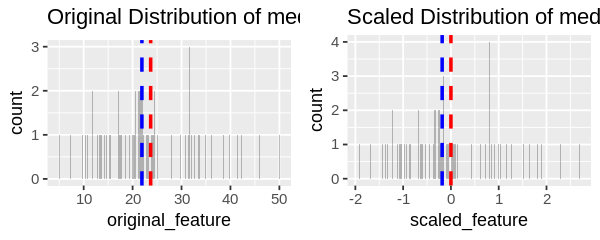

In [16]:
scaled_v_original('crim')
scaled_v_original('zn')
scaled_v_original('indus')
scaled_v_original('chas')
scaled_v_original('nox')
scaled_v_original('rm')
scaled_v_original('age')
scaled_v_original('dis')
scaled_v_original('rad')
scaled_v_original('tax')
scaled_v_original('ptratio')
scaled_v_original('black')
scaled_v_original('lstat')
scaled_v_original('medv')

heatmapping

In [18]:
library(reshape2)
cormat = cor(sample_2)

In [19]:
cormat[lower.tri(cormat)] <- NA

In [20]:
melted_cormat <- melt(cormat, na.rm = T)

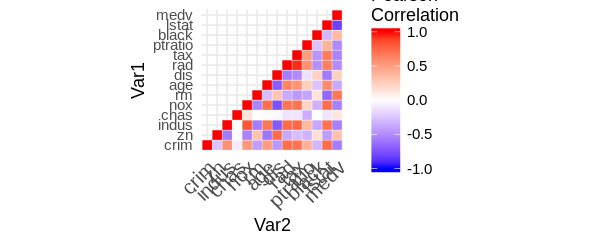

In [21]:
library(ggplot2)
ggplot(data = melted_cormat, aes(Var2, Var1, fill = value))+
 geom_tile(color = "white")+
 scale_fill_gradient2(low = "blue", high = "red", mid = "white", 
   midpoint = 0, limit = c(-1,1), space = "Lab", 
   name="Pearson\nCorrelation") +
  theme_minimal()+ 
 theme(axis.text.x = element_text(angle = 45, vjust = 1, 
    size = 12, hjust = 1))+
 coord_fixed()

Prepare a speculation as to what each sample might represent.

Discuss whether values across categories be easily compared.